# POSTTEST 6
## Nama : Hendy Saputra 
## Nim  : 2109106120

### Libarary yang di gunakan

In [27]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow import keras
import matplotlib.pyplot as plt



### Menampilkan data dalam dataset

In [28]:
data = pd.read_csv("diabetes_prediction_dataset.csv")

data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


### Memilih Atribut x dan y

In [29]:
# Memilih atribut age dan blood_glucose_level sebagai atribut x
X = data[['age', 'blood_glucose_level']]

# Memilih atribut diabetes sebagai label y
y = data['diabetes']

### Split Dataset Menjadi train dan set

In [30]:
# Memisahkan dataset menjadi train  dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Melakukan Preprocessing dengan Normalisasi

In [31]:
# Normalisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Membangun model Dengan Sequential
#### Dan Output Layer Target Saya Adalah Kategorikal Menggunakan biner

In [32]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(2,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  
    ])

### Compile Model Dengan binary_crossentropy, accuracy

In [33]:
# Kompilasi model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



### Melatih Model

In [34]:
# Pelatihan model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/keras/src/engine/data_adapter.py:1808: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


2250/2250 [==============================] - 7s 3ms/step - loss: 0.1825 - accuracy: 0.9430 - val_loss: 0.1664 - val_accuracy: 0.9457
Epoch 2/50
2250/2250 [==============================] - 6s 3ms/step - loss: 0.1614 - accuracy: 0.9479 - val_loss: 0.1637 - val_accuracy: 0.9463
Epoch 3/50
2250/2250 [==============================] - 6s 3ms/step - loss: 0.1603 - accuracy: 0.9480 - val_loss: 0.1627 - val_accuracy: 0.9464
Epoch 4/50
2250/2250 [==============================] - 6s 3ms/step - loss: 0.1600 - accuracy: 0.9481 - val_loss: 0.1626 - val_accuracy: 0.9463
Epoch 5/50
2250/2250 [==============================] - 6s 3ms/step - loss: 0.1600 - accuracy: 0.9480 - val_loss: 0.1624 - val_accuracy: 0.9464
Epoch 6/50
2250/2250 [==============================] - 6s 3ms/step - loss: 0.1597 - accuracy: 0.9481 - val_loss: 0.1649 - val_accuracy: 0.9464
Epoch 7/50
2250/2250 [==============================] - 7s 3ms/step - loss: 0.1598 - accuracy: 0.9481 - val_loss: 0.1629 - val_accuracy: 0.9464
Epo

### Melatih Model Dengan Accuracy

In [35]:
# Evaluasi model pada test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")  
accuracy = accuracy_score(y_test, y_pred)



625/625 [==============================] - 1s 2ms/step


### Grafik Akurasi

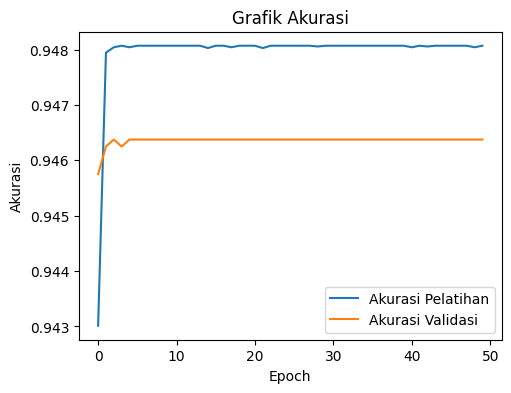

In [36]:
# Membuat grafik pergerakan metrik (akurasi dan loss)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Akurasi Pelatihan')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.title('Grafik Akurasi')
plt.legend(loc='lower right')

### Grafik Loss

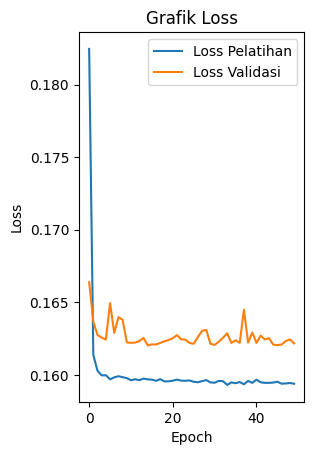

In [37]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss Pelatihan')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Grafik Loss')
plt.show()

### Output Nilai dengan AKURASI

In [38]:
print("Akurasi model pada test set",accuracy)

Akurasi model pada test set 0.94725
